### KNearest Neighbor: Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# load csv-file: telecom churn
telecom = pd.read_csv("telecom_churn.csv")
telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [38]:
telecom["Churn"].to_frame()

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [39]:
# define function -> transform data
def transform_data(data, sel_feature): 
  target_data = data[sel_feature].to_frame()
  data = data.drop(columns=[sel_feature], axis=1)
  transformed_data = pd.concat([data, target_data], axis=1)
  return transformed_data

In [40]:
# transform data with label churn
telecom = transform_data(telecom, "Churn")
telecom.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [41]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     3333 non-null   int64  
 1   ContractRenewal  3333 non-null   int64  
 2   DataPlan         3333 non-null   int64  
 3   DataUsage        3333 non-null   float64
 4   CustServCalls    3333 non-null   int64  
 5   DayMins          3333 non-null   float64
 6   DayCalls         3333 non-null   int64  
 7   MonthlyCharge    3333 non-null   float64
 8   OverageFee       3333 non-null   float64
 9   RoamMins         3333 non-null   float64
 10  Churn            3333 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [43]:
telecom.shape

(3333, 11)

### Model Training

In [44]:
# initialise x and y variable
def model_training(data, target): 
  X = data.drop(columns=[target])
  Y = data[target]

  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=1234)
  training, testing = (xtrain, ytrain), (xtest, ytest)
  return training, testing

training, testing = model_training(telecom, "Churn")

# print(f"X: Training {xtrain.shape} - Testing {xtest.shape}")


In [50]:
xtrain, ytrain = training
xtest, ytest = testing
labels = ["X", "Y"]

for train, test, label in zip(training, testing, labels): 
  print(f"{label}: Training {train.shape} - Testing {test.shape}")


X: Training (2499, 10) - Testing (834, 10)
Y: Training (2499,) - Testing (834,)


In [51]:
# build a KNN classifier model
def knn_model_building(train_data, k): 
  # initialise training data for X and Y --> train the model
  xtrain = train_data[0]
  ytrain = train_data[1]
  
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(xtrain, ytrain)
  return knn_model


In [69]:
knn_model1 = knn_model_building((xtrain, ytrain), 4)
knn_model2 = knn_model_building((xtrain, ytrain), 15)

### Model Evaluation

In [70]:
# make predictions on testing set
ypred = knn_model1.predict(xtest)
ypred2 = knn_model2.predict(xtest)

In [76]:
# determine accuracy of the model
print("Accuracy: ")
model_accur = accuracy_score(ytest, ypred)
model_accur2 = accuracy_score(ytest, ypred2)
print(f"Accuracy model 1: {model_accur:.2f}")
print(f"Accuracy model 2: {model_accur2:.2f}")

Accuracy: 
Accuracy model 1: 0.86
Accuracy model 2: 0.87


In [74]:
# display confusion matrix
print("Confusion Matrix: ")
conf_matrix1 = confusion_matrix(ytest, ypred)
conf_matrix2 = confusion_matrix(ytest, ypred2)
conf_matrix2

Confusion Matrix: 


array([[692,  12],
       [100,  30]], dtype=int64)

In [81]:
# make a classification report for model 1
class_report1 = classification_report(ytest, ypred)
print(class_report1)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       704
           1       0.67      0.17      0.27       130

    accuracy                           0.86       834
   macro avg       0.77      0.58      0.60       834
weighted avg       0.83      0.86      0.82       834



In [82]:
# make a classification report for model 2
class_report2 = classification_report(ytest, ypred2)
print(class_report2)

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       704
           1       0.71      0.23      0.35       130

    accuracy                           0.87       834
   macro avg       0.79      0.61      0.64       834
weighted avg       0.85      0.87      0.84       834



### Model Visualisation: K-values

In [85]:
def knn_model_visualisation(training,testing):
  xtrain, ytrain = training
  xtest, ytest = testing
  kvalues = range(1,21)
  accuracies = []

  for k in kvalues: 
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(xtrain, ytrain)
    ypred = knn_model.predict(xtest)
    acc = accuracy_score(ytest, ypred)
    accuracies.append(acc)
  
  # plot the relationship between k values and accuracy
  plt.plot(kvalues, accuracies, marker="o", color="black")
  plt.xlabel("Number of neighbors(K)")
  plt.ylabel("Accuracy")
  plt.title("K values vs Accuracy")
  plt.show()

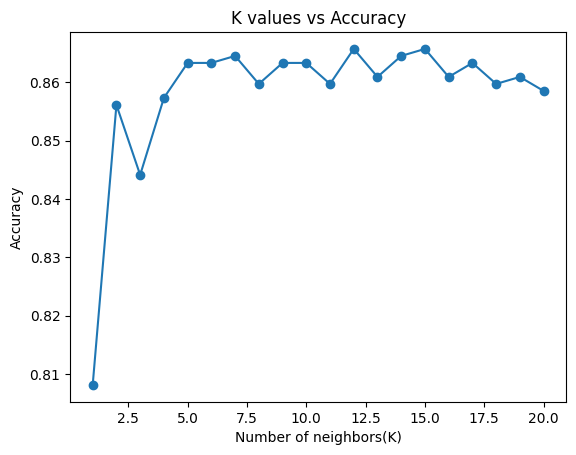

In [86]:
knn_model_visualisation(training, testing)